# The Light Bulb Puzzle

In [1]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
import numpy as np

## Animation with `matplotlib`

If we use the IPython `clear_output()` function together with `matplotlib`, we can create animations.

## The Light Bulb Puzzle

In [2]:
plt.rcParams['figure.figsize'] = (20, 4)

The light bulb puzzle goes like this: You are standing at one end of a very long hall. On the ceiling are (say) 1000 lights, all in a line, each with its own pull-cord. At the moment all lights are off, but presently a man comes in with a big “#1” on his shirt, and \#1 pulls all 1000 cords, turning all the lights on. Soon after him a man with a “#2” on his shirt comes in and pulls the cords of the second light, the fourth light etc., turning every second light back off. This second man is followed by \#3, who pulls the switch of every third light, turning some off and some back on. This process continues with a man who pulls the cord of every fourth light, then a man who pulls the cord of every fifth light, and so on, until finally a man with “#1000” on his shirt comes in, walks the length of the hall and stops only to pull the cord of the very last light.

At the end of this exercise, you notice something interesting about the positions of the lights that are on. What do you notice? That is, which lights are on––and how many are there?

## Analytic Solution

Clearly each light will be pulled according to the *factors* of its number. So for example the sixth light will be pulled by men 1, 2, 3, and 6; while the twentieth light will be pulled by men 1, 2, 4, 5, 10, and 20.

Now here's the crucial point to notice: Factors come in *pairs*: $20 = 4\times 5$, so that means both man \#4 and man \#5 will pull the cord of light \#20. So if factors always come in pairs, doesn't that mean that *every* light cord will be pulled an even number of times? And so wouldn't *all* the lights be off at the end?

No, because some factors are paired with *themselves*. Consider the fourth light. The factors of 4 are 1, 2, and 4, 2 being paired with *itself*. The fourth light's cord will therefore be pulled only *three* times and so will be on at the end.

So which lights have factors that are paired themselves? If we can write a number $n$ as $f\times f$ for some factor $f$, then that's to say that $n$ is a **perfect square**.

And so the lights with perfect squares for numbers will be on at the end. And so if we start with 1000 lights, there will be 31 lights on, namely: 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, and 961.

## Simulation with `matplotlib`

Of course, another way to solve the problem would be to *simulate* it. And if we take advantage of IPython, we can do that! Consider the following function:

In [3]:
def lights_problem(n=10, on_color='c'): # Set default values for the
                                        # number of lights and for
                                        # the color of a bulb that is on.
    
    # Number the lights starting
    # with 1.
    lights = np.arange(1, n+1)          
    
    # All lights start off. We'll represent that with the color black.
    c_old = n*'k'                       
    
    # We'll plot all the lights on a line. (It's not important that they be
    # at 0. We could multiply this y by any scalar and see virtually the
    # same plot.)
    y = np.zeros(n)
    
    # Plot the starting ("off") position, using a nice large marker for
    # each light.
    plt.scatter(lights, y, c=c_old, s=500, marker='o') 
    
    # Now the men enter.
    for man in np.arange(1, n+1):
        
        # Clear the matplotlib figure
        clear_output(wait=True)
        
        # Initialize the new off/on (color) sequence
        c_new = ''
        
        # For each light:
        for light in np.arange(1, n+1):
            
            #If its number is a multiple of the current man's number:
            if light % man == 0:
                
                # If the light was off, turn it on.
                if c_old[light-1] == 'k':
                    c_new += on_color
                
                # If it was on, turn it off.
                else:
                    c_new += 'k'
            
            # Otherwise, just leave it alone.
            else:
                c_new += c_old[light-1]
        
        # Plot the new sequence.
        plt.scatter(lights, y, c=c_new, s=500, marker='o')
        plt.show()
        
        # Use the new sequence as the old one for the next man up.
        c_old = c_new
        
    # return the positions of the lights that are on
    out = dict(zip(np.arange(1, n+1), c_new))
    return [k for k in out if out[k] == on_color]

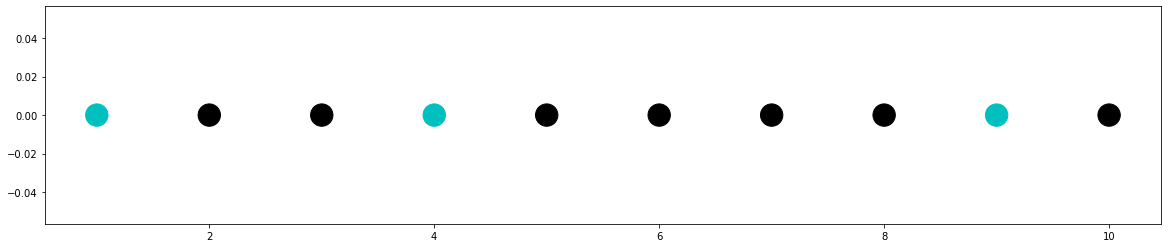

[1, 4, 9]

In [4]:
lights_problem()

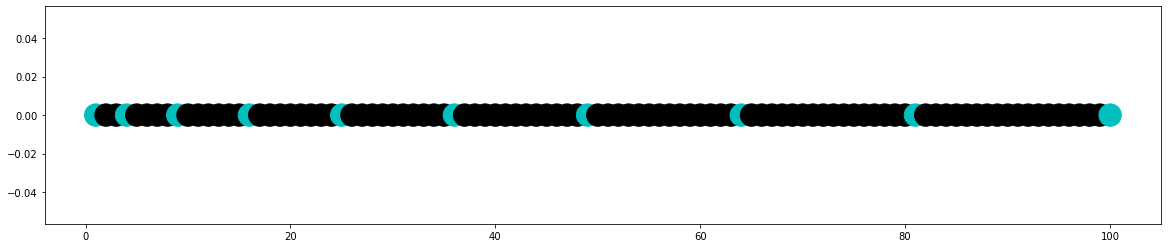

In [5]:
light100 = lights_problem(n=100)

In [6]:
len(light100)

10

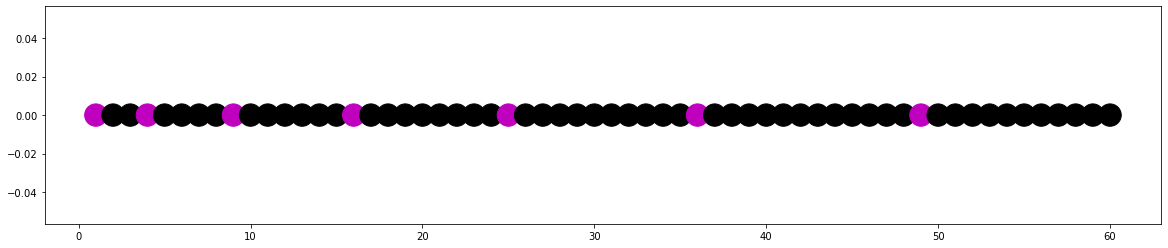

[1, 4, 9, 16, 25, 36, 49]

In [7]:
lights_problem(n=60, on_color='m')

Let's answer our original problem. This may take a little time but at least we can watch our progress!

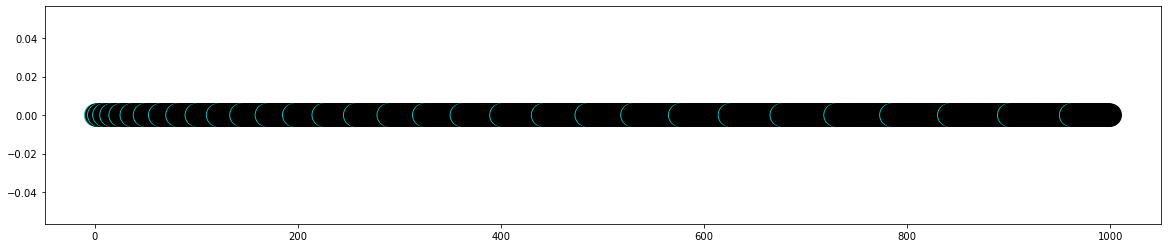

In [8]:
light1000 = lights_problem(n=1000)

In [9]:
print(light1000)
print(len(light1000))

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961]
31


Just as we calculated. Nice!